In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [28]:
IMAGE_SIZE=[224,224]

In [29]:
# given data set path
train_path='/content/drive/MyDrive/DLCVNLP/Transfer_learning/data/train'
test_path='/content/drive/MyDrive/DLCVNLP/Transfer_learning/data/test'


In [30]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [31]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable=False

In [32]:
# useful for getting number of classes
folders=glob('/content/drive/MyDrive/DLCVNLP/Transfer_learning/data/train/*')
print(len(folders))

2


In [33]:
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [34]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
# Data augmentation
train_datagen=ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

In [36]:
# data augmentation
test_datagen=ImageDataGenerator(
rescale=1./255)

In [37]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/DLCVNLP/Transfer_learning/data/train',target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')


Found 8017 images belonging to 2 classes.


In [38]:
test_set=train_datagen.flow_from_directory('/content/drive/MyDrive/DLCVNLP/Transfer_learning/data/train',target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')


Found 8017 images belonging to 2 classes.


In [39]:
#fit model
r=model.fit_generator(
training_set,
validation_data=test_set,
epochs=2,
steps_per_epoch=len(training_set),
validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
251/251 [==============================] - 226s 873ms/step - loss: 0.4254 - accuracy: 0.8128 - val_loss: 0.1768 - val_accuracy: 0.9258
Epoch 2/2
251/251 [==============================] - 214s 853ms/step - loss: 0.2238 - accuracy: 0.9080 - val_loss: 0.1631 - val_accuracy: 0.9324


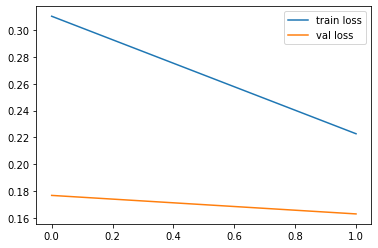

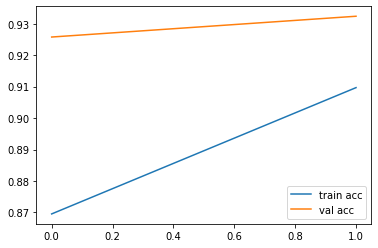

<Figure size 432x288 with 0 Axes>

In [40]:
# plot the loss

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [41]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_vgg.h5')

In [42]:
#prediction 

img=image.load_img('/content/drive/MyDrive/DLCVNLP/Transfer_learning/data/test/cats/cat.4025.jpg',target_size=(224,224))

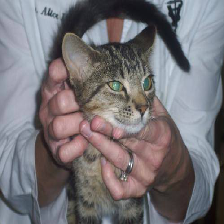

In [43]:
img

In [44]:
test_image = image.img_to_array(img)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [45]:
result

array([[0.9946801, 0.0053199]], dtype=float32)

In [46]:
a=np.argmax(model.predict(test_image),axis=1)


In [47]:
if a==0:
  print("The classified image is of Cat")
else:
  print("The classified image is of dog")

The classified image is of Cat
